In [40]:
import pandas as pd


begin = pd.read_csv('https://raw.githubusercontent.com/khdhaer/sari_thesis/main/begin.csv')
ADWARE_DOWGIN = pd.read_csv('https://raw.githubusercontent.com/khdhaer/sari_thesis/main/ADWARE_DOWGIN.csv')
RANSOMWARE_CHARG = pd.read_csv('https://raw.githubusercontent.com/khdhaer/sari_thesis/main/RANSOMWARE_CHARG.csv')
begin,RANSOMWARE_CHARG,ADWARE_DOWGIN


frames = [ADWARE_DOWGIN, RANSOMWARE_CHARG,begin]
df = pd.concat(frames)
df = df.sample(frac=1)
df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
3291,10.42.0.211-64.71.142.124-39882-443-6,10.42.0.211,39882,64.71.142.124,443,6,28/08/2017 02:30:23,31,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,64516.129032,3.100000e+01,0.000000,31.0,31.0,31.0,3.100000e+01,0.000000,31.0,31.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,40,0,0,0,0,0,0,2,0,0,0,0,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
4006,10.42.0.211-10.42.0.1-17165-53-17,10.42.0.211,17165,10.42.0.1,53,17,28/08/2017 02:24:05,681,1,1,38.0,126.0,38.0,38.0,38.000000,0.000000,126.0,126.0,126.000000,0.000000,240822.320117,2936.857562,6.810000e+02,0.000000,681.0,681.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,...,126.0,67.333333,50.806824,2581.333333,0,0,0,0,0,0,0,0,1.0,101.000000,38.000000,126.000000,32,0,0,0,0,0,0,1,38,1,126,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
2888,172.217.11.3-10.42.0.211-443-59979-6,10.42.0.211,59979,172.217.11.3,443,6,28/08/2017 03:20:59,2088867,17,34,2266.0,35982.0,972.0,0.0,133.294118,281.856072,1418.0,0.0,1058.294118,585.901302,18310.404636,24.415149,4.177734e+04,197765.899410,1395384.0,11.0,2088867.0,1.305542e+05,344654.768510,1395384.0,427.0,2007526.0,60834.121212,250554.616807,1436041.0,11.0,0,0,0,0,...,1418.0,735.538462,669.328679,448000.880845,0,0,0,1,0,0,0,0,2.0,749.960784,133.294118,1058.294118,552,0,0,0,0,0,0,17,2266,34,35982,65535,190,4,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
3310,10.42.0.211-10.42.0.1-2359-53-17,10.42.0.211,2359,10.42.0.1,53,17,28/08/2017 02:30:29,84177,1,1,36.0,93.0,36.0,36.0,36.000000,0.000000,93.0,93.0,93.000000,0.000000,1532.485121,23.759459,8.417700e+04,0.000000,84177.0,84177.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,...,93.0,55.000000,32.908965,1083.000000,0,0,0,0,0,0,0,0,1.0,82.500000,36.000000,93.000000,32,0,0,0,0,0,0,1,36,1,93,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
492,172.217.9.238-10.42.0.151-443-45761-6,172.217.9.238,443,10.42.0.151,45761,6,04/08/2017 09:05:12,3861,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,518.000518,3.861000e+03,0.000000,3861.0,3861.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,447,1453,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [41]:
X = df.iloc[:, :-1].values

X=df.drop(columns=['Flow ID', ' Source IP', ' Source Port',' Destination IP',' Destination Port',' Timestamp',' Protocol',' Label',])
y = df.iloc[:, 84].values
y= pd.factorize(y)[0]


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [43]:

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier


def Select_Features(X_train,y_train,num):
    # Build RF classifier to use in feature selection
    clf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
    
    # Build step forward feature selection
    sfs1 = sfs(clf,
               k_features=num,
               forward=True,
               floating=False,
               verbose=2,
               scoring='accuracy',
               cv=5)
    
    # Perform SFFS
    sfs1 = sfs1.fit(X_train, y_train)
    
    
    feat_cols = list(sfs1.k_feature_idx_)
    
    return feat_cols


In [44]:
# calling a selecting function that uses RandomForestClassifier to reduse the number of features to ,
Selected=Select_Features(X_train , y_train , num=30)

# updating my features to use only selected features.

X_train=X_train.iloc[:, Selected]
X_test=X_test.iloc[:, Selected]

# scale the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:  1.4min finished

[2021-10-13 18:06:43] Features: 1/30 -- score: 0.5999414560308078[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:  1.4min finished

[2021-10-13 18:08:10] Features: 2/30 -- score: 0.6170967311095529[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.4min finished

[2021-10-13 18:09:36] Features: 3/30 -- score: 0.644391242890692[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [45]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [85]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'

  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),

  tf.keras.layers.Dense(3, activation="softmax") # output shape is 3, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model X_train, X_test, y_train, y_test 
history = model_14.fit(X_train,
                       y_train,
                       epochs=20,
                       validation_data=(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
210/210 [==============================] - 2s 5ms/step - loss: 1.0022 - accuracy: 0.5685 - val_loss: 0.9241 - val_accuracy: 0.5725
Epoch 2/20
210/210 [==============================] - 1s 4ms/step - loss: 0.9143 - accuracy: 0.5685 - val_loss: 0.9003 - val_accuracy: 0.5725
Epoch 3/20
210/210 [==============================] - 1s 4ms/step - loss: 0.9016 - accuracy: 0.5685 - val_loss: 0.8927 - val_accuracy: 0.5725
Epoch 4/20
210/210 [==============================] - 1s 4ms/step - loss: 0.8975 - accuracy: 0.5685 - val_loss: 0.8885 - val_accuracy: 0.5725
Epoch 5/20
210/210 [==============================] - 1s 4ms/step - loss: 0.8948 - accuracy: 0.5685 - val_loss: 0.8861 - val_accuracy: 0.5725
Epoch 6/20
210/210 [==============================] - 1s 4ms/step - loss: 0.8922 - accuracy: 0.5685 - val_loss: 0.8841 - val_accuracy: 0.5725
Epoch 7/20
210/210 [==============================] - 1s 4ms/step - loss: 0.8907 - accuracy: 0.5685 - val_loss: 0.8826 - val_accuracy: 0.5725
Epoch 

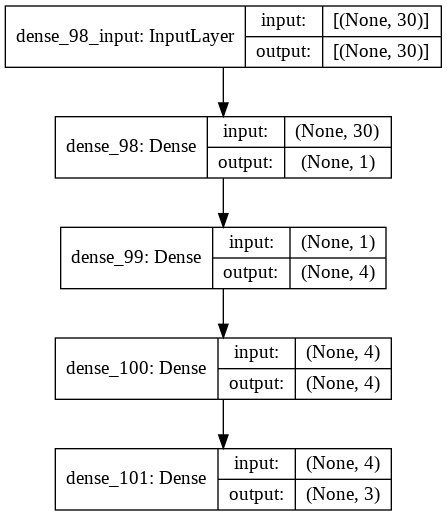

In [86]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)

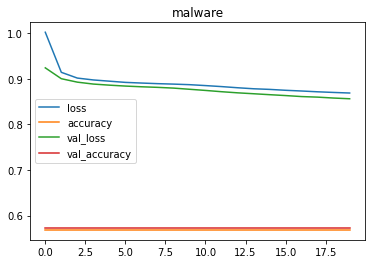

In [87]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history.history).plot(title="malware")


array([[ 0.05067809,  0.04739555, -0.48557213, ...,  2.27899716,
         0.60099038, -0.03305991],
       [-0.0494309 , -0.59385519, -0.60889385, ..., -0.20582666,
        -0.83274647, -0.17629773],
       [-0.05343526, -0.59385519, -0.60889385, ..., -0.20582666,
         0.60099038, -0.17629773],
       ...,
       [-0.0494309 , -0.59385519, -0.60889385, ..., -0.20582666,
        -0.83274647, -0.17629773],
       [-0.05343526, -0.59385519, -0.60889385, ..., -0.20582666,
        -0.83274647, -0.17629773],
       [-0.05343526, -0.59385519, -0.60889385, ..., -0.20582666,
        -3.22230789, -0.17629773]])

In [91]:
Selected

[2,
 5,
 9,
 10,
 14,
 15,
 17,
 21,
 22,
 23,
 27,
 28,
 30,
 32,
 36,
 38,
 40,
 43,
 44,
 45,
 47,
 54,
 59,
 60,
 61,
 65,
 66,
 67,
 68,
 72]